In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('data\Kickstarter_projects_Feb19.csv')
df.head()

,id,name,currency,main_category,sub_category,launched_at,deadline,duration,goal_usd,city,state,country,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged
0,1687733153,Socks of Speed and Socks of Elvenkind,USD,games,Tabletop Games,2018-10-30 20:00:02,2018-11-15 17:59:00,16.0,2000.00000,Menasha,WI,US,14,7,successful,10,11,Q4,Q4,6061.00000
1,227936657,Power Punch Boot Camp: An All-Ages Graphic Novel,GBP,comics,Comic Books,2018-08-06 10:00:43,2018-09-05 10:00:43,30.0,3870.99771,Shepperton,England,GB,24,8,successful,8,9,Q3,Q3,3914.50512
2,454186436,"Live Printing with SX8: ""Squeegee Pulp Up""",USD,fashion,Apparel,2017-06-09 15:41:03,2017-07-09 15:41:03,30.0,1100.00000,Manhattan,NY,US,21,7,successful,6,7,Q2,Q3,1110.00000
3,629469071,Lost Dog Street Band's Next Album,USD,music,Country & Folk,2014-09-25 18:46:01,2014-11-10 06:00:00,45.0,3500.00000,Nashville,TN,US,15,6,successful,9,11,Q3,Q4,4807.00000
4,183973060,"Qto-X, a Tiny Lantern",USD,technology,Gadgets,2016-11-28 16:35:11,2017-01-27 16:35:11,60.0,30000.00000,Troy,MI,US,15,4,successful,11,1,Q4,Q1,40368.00000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192548 entries, 0 to 192547
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             192548 non-null  int64  
 1   name           192548 non-null  object 
 2   currency       192548 non-null  object 
 3   main_category  192548 non-null  object 
 4   sub_category   192548 non-null  object 
 5   launched_at    192548 non-null  object 
 6   deadline       192548 non-null  object 
 7   duration       192548 non-null  float64
 8   goal_usd       192548 non-null  float64
 9   city           192548 non-null  object 
 10  state          192548 non-null  object 
 11  country        192548 non-null  object 
 12  blurb_length   192548 non-null  int64  
 13  name_length    192548 non-null  int64  
 14  status         192548 non-null  object 
 15  start_month    192548 non-null  int64  
 16  end_month      192548 non-null  int64  
 17  start_Q        192548 non-nul

In [4]:
# The dataset content duplicated datas.
print (df.duplicated().value_counts())

False    170730
True      21818
dtype: int64


In [4]:
# Duplicated datas dropped and 170730 entries remain.
df.drop_duplicates(keep='first', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170730 entries, 0 to 192547
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             170730 non-null  int64  
 1   name           170730 non-null  object 
 2   currency       170730 non-null  object 
 3   main_category  170730 non-null  object 
 4   sub_category   170730 non-null  object 
 5   launched_at    170730 non-null  object 
 6   deadline       170730 non-null  object 
 7   duration       170730 non-null  float64
 8   goal_usd       170730 non-null  float64
 9   city           170730 non-null  object 
 10  state          170730 non-null  object 
 11  country        170730 non-null  object 
 12  blurb_length   170730 non-null  int64  
 13  name_length    170730 non-null  int64  
 14  status         170730 non-null  object 
 15  start_month    170730 non-null  int64  
 16  end_month      170730 non-null  int64  
 17  start_Q        170730 non-nul

In [8]:
# No null value in the data set
df.isna().sum()

id               0
name             0
currency         0
main_category    0
sub_category     0
launched_at      0
deadline         0
duration         0
goal_usd         0
city             0
state            0
country          0
blurb_length     0
name_length      0
status           0
start_month      0
end_month        0
start_Q          0
end_Q            0
usd_pledged      0
dtype: int64

In [9]:
df.describe()

,id,duration,goal_usd,blurb_length,name_length,start_month,end_month,usd_pledged
count,1.707300e+05,170730.000000,1.707300e+05,170730.000000,170730.000000,170730.000000,170730.000000,1.707300e+05
mean,1.072895e+09,32.602314,3.993344e+04,19.038470,5.708639,6.478041,6.758051,1.215889e+04
std,6.192139e+08,11.711483,1.073156e+06,4.955265,2.707080,3.327358,3.353299,8.429082e+04
min,8.624000e+03,1.000000,1.000000e-02,1.000000,1.000000,1.000000,1.000000,0.000000e+00
25%,5.355054e+08,30.000000,1.500000e+03,17.000000,4.000000,4.000000,4.000000,1.000000e+02
50%,1.074770e+09,30.000000,5.000000e+03,20.000000,6.000000,7.000000,7.000000,1.486703e+03
75%,1.607597e+09,34.000000,1.290333e+04,22.000000,8.000000,9.000000,10.000000,6.262833e+03
max,2.147476e+09,93.000000,1.290333e+08,35.000000,27.000000,12.000000,12.000000,8.596475e+06


## Univariate 

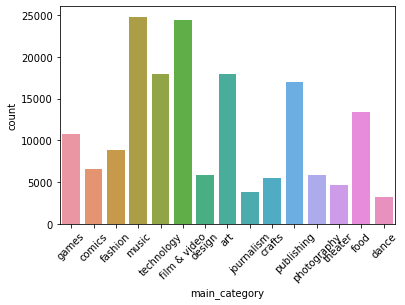

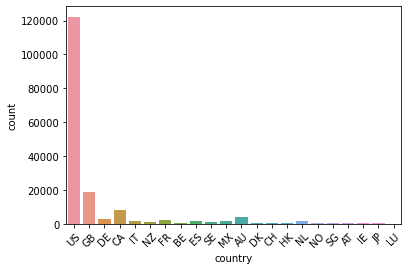

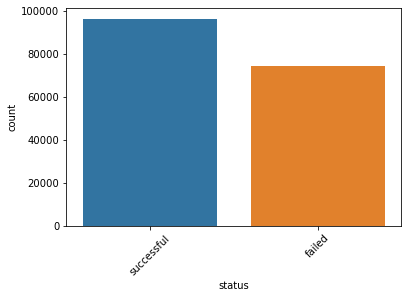

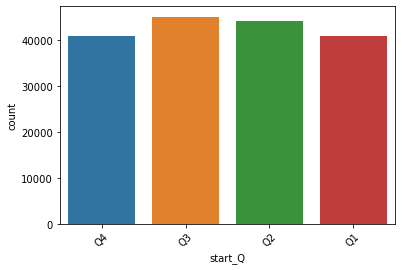

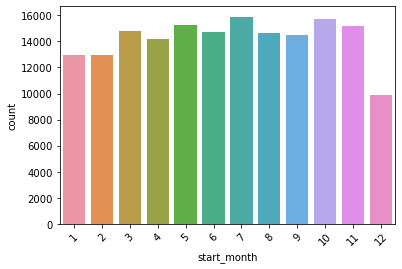

In [34]:
# countplot for main_category, country, status,start_Q, 'start month'
count = ['main_category', 'country', 'status','start_Q','start_month']

for i in range(0,5):
    sns.countplot(data = df, x = count[i])
    plt.xticks (rotation = 45)
    plt.show()

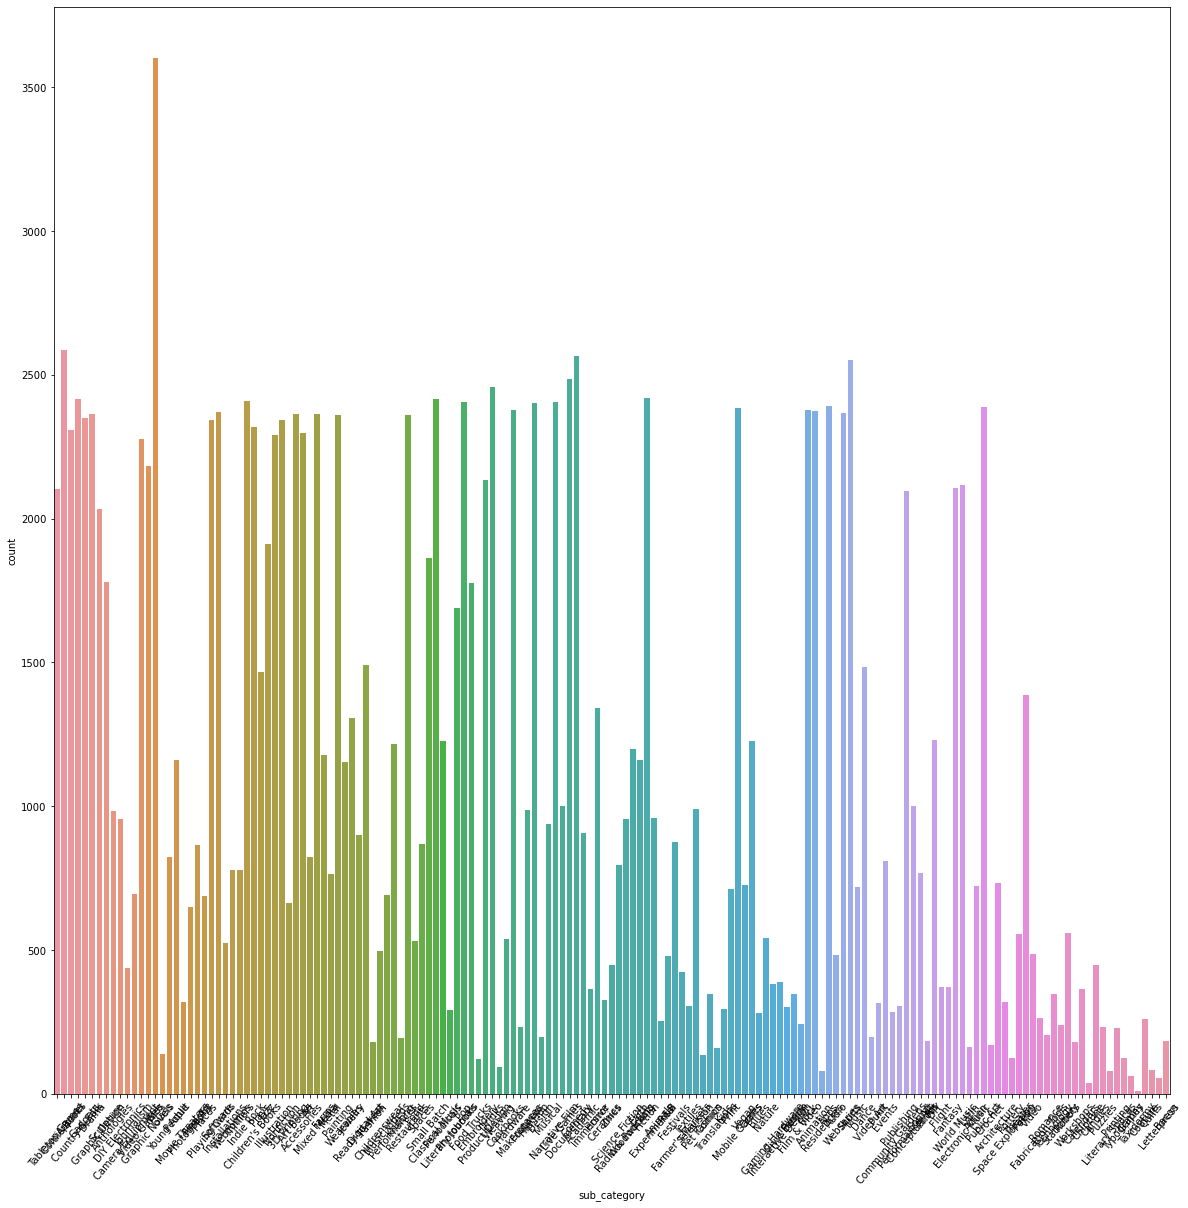

In [24]:
plt.subplots(figsize=(20,20))
sns.countplot(data=df, x ='sub_category')
plt.xticks(rotation = 50)
plt.show()

<AxesSubplot:xlabel='count', ylabel='main_sub_category'>

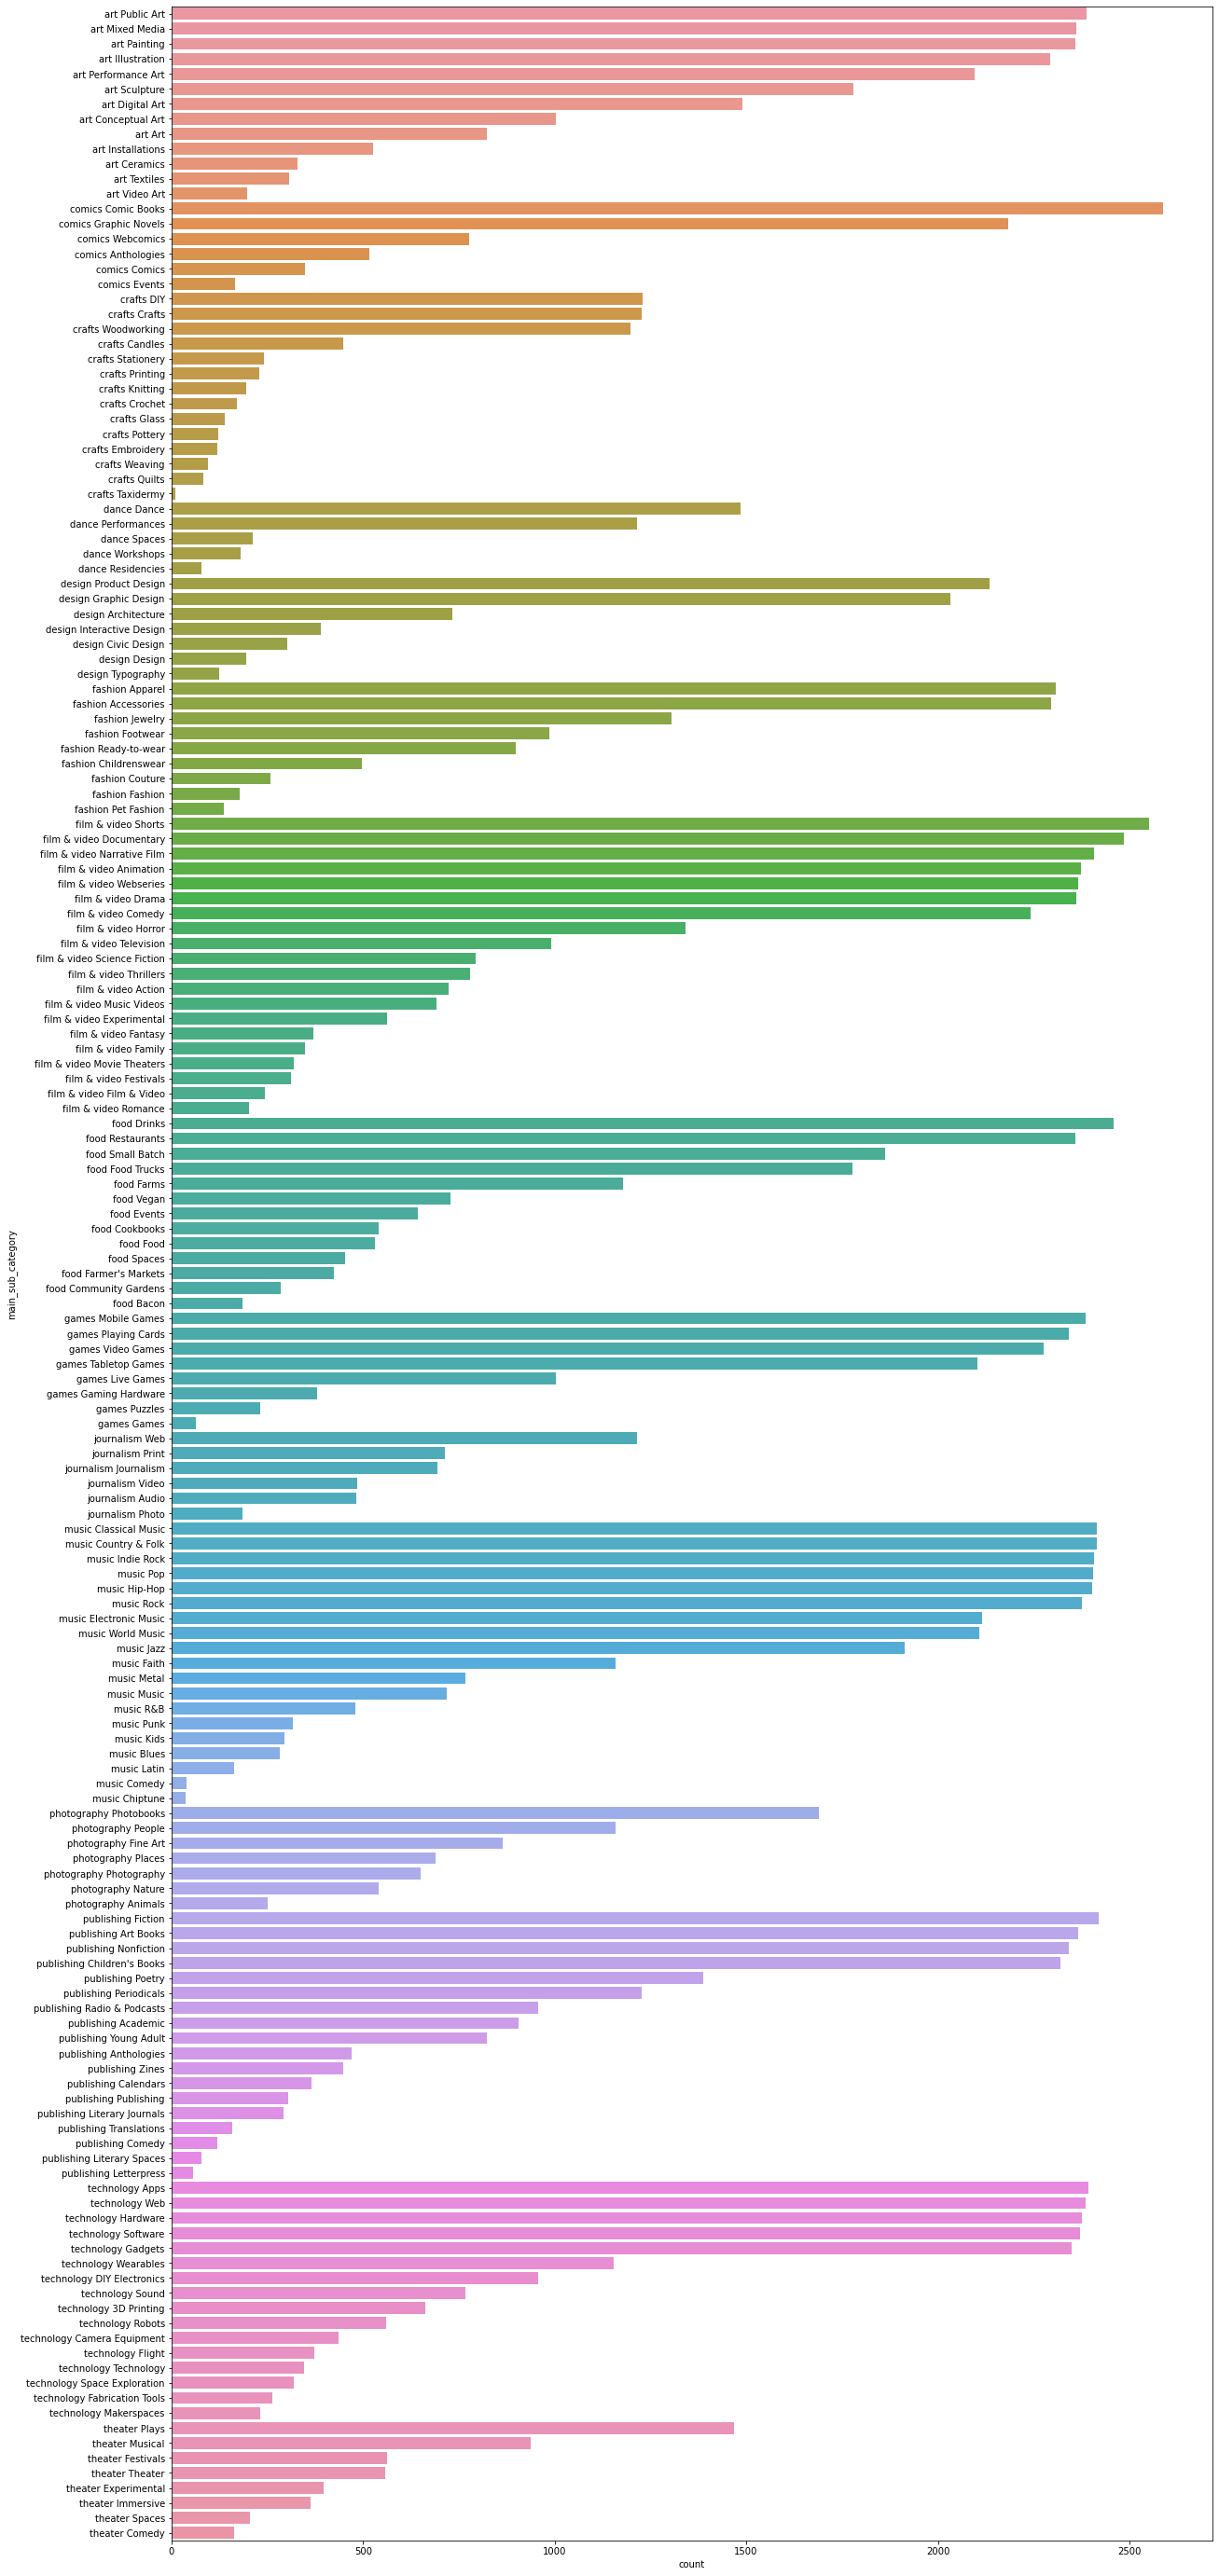

In [5]:
df_sub = df.copy()
df_sub['main_sub_category'] = df_sub['main_category'] + ' ' + df_sub['sub_category']
plt.subplots(figsize=(20, 50))
sns.countplot(y = 'main_sub_category', data = df_sub, order = df_sub.groupby('main_category')['main_sub_category'].value_counts().index.get_level_values(1))

<AxesSubplot:>

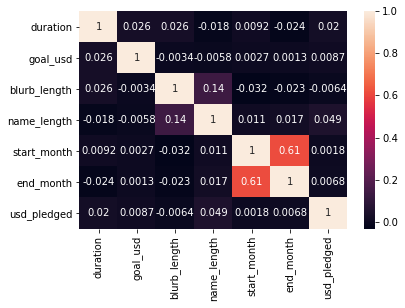

In [12]:
df_num = df[['duration','goal_usd','blurb_length','name_length','start_month','end_month','usd_pledged']]
sns.heatmap (df_num.corr(), annot = True)

In [21]:
df['success'] = df['status'].apply(lambda x: 1 if x=='successful' else 0)
df.head()

,id,name,currency,main_category,sub_category,launched_at,deadline,duration,goal_usd,city,...,country,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged,success
0,1687733153,Socks of Speed and Socks of Elvenkind,USD,games,Tabletop Games,2018-10-30 20:00:02,2018-11-15 17:59:00,16.0,2000.00000,Menasha,...,US,14,7,successful,10,11,Q4,Q4,6061.00000,1
1,227936657,Power Punch Boot Camp: An All-Ages Graphic Novel,GBP,comics,Comic Books,2018-08-06 10:00:43,2018-09-05 10:00:43,30.0,3870.99771,Shepperton,...,GB,24,8,successful,8,9,Q3,Q3,3914.50512,1
2,454186436,"Live Printing with SX8: ""Squeegee Pulp Up""",USD,fashion,Apparel,2017-06-09 15:41:03,2017-07-09 15:41:03,30.0,1100.00000,Manhattan,...,US,21,7,successful,6,7,Q2,Q3,1110.00000,1
3,629469071,Lost Dog Street Band's Next Album,USD,music,Country & Folk,2014-09-25 18:46:01,2014-11-10 06:00:00,45.0,3500.00000,Nashville,...,US,15,6,successful,9,11,Q3,Q4,4807.00000,1
4,183973060,"Qto-X, a Tiny Lantern",USD,technology,Gadgets,2016-11-28 16:35:11,2017-01-27 16:35:11,60.0,30000.00000,Troy,...,US,15,4,successful,11,1,Q4,Q1,40368.00000,1


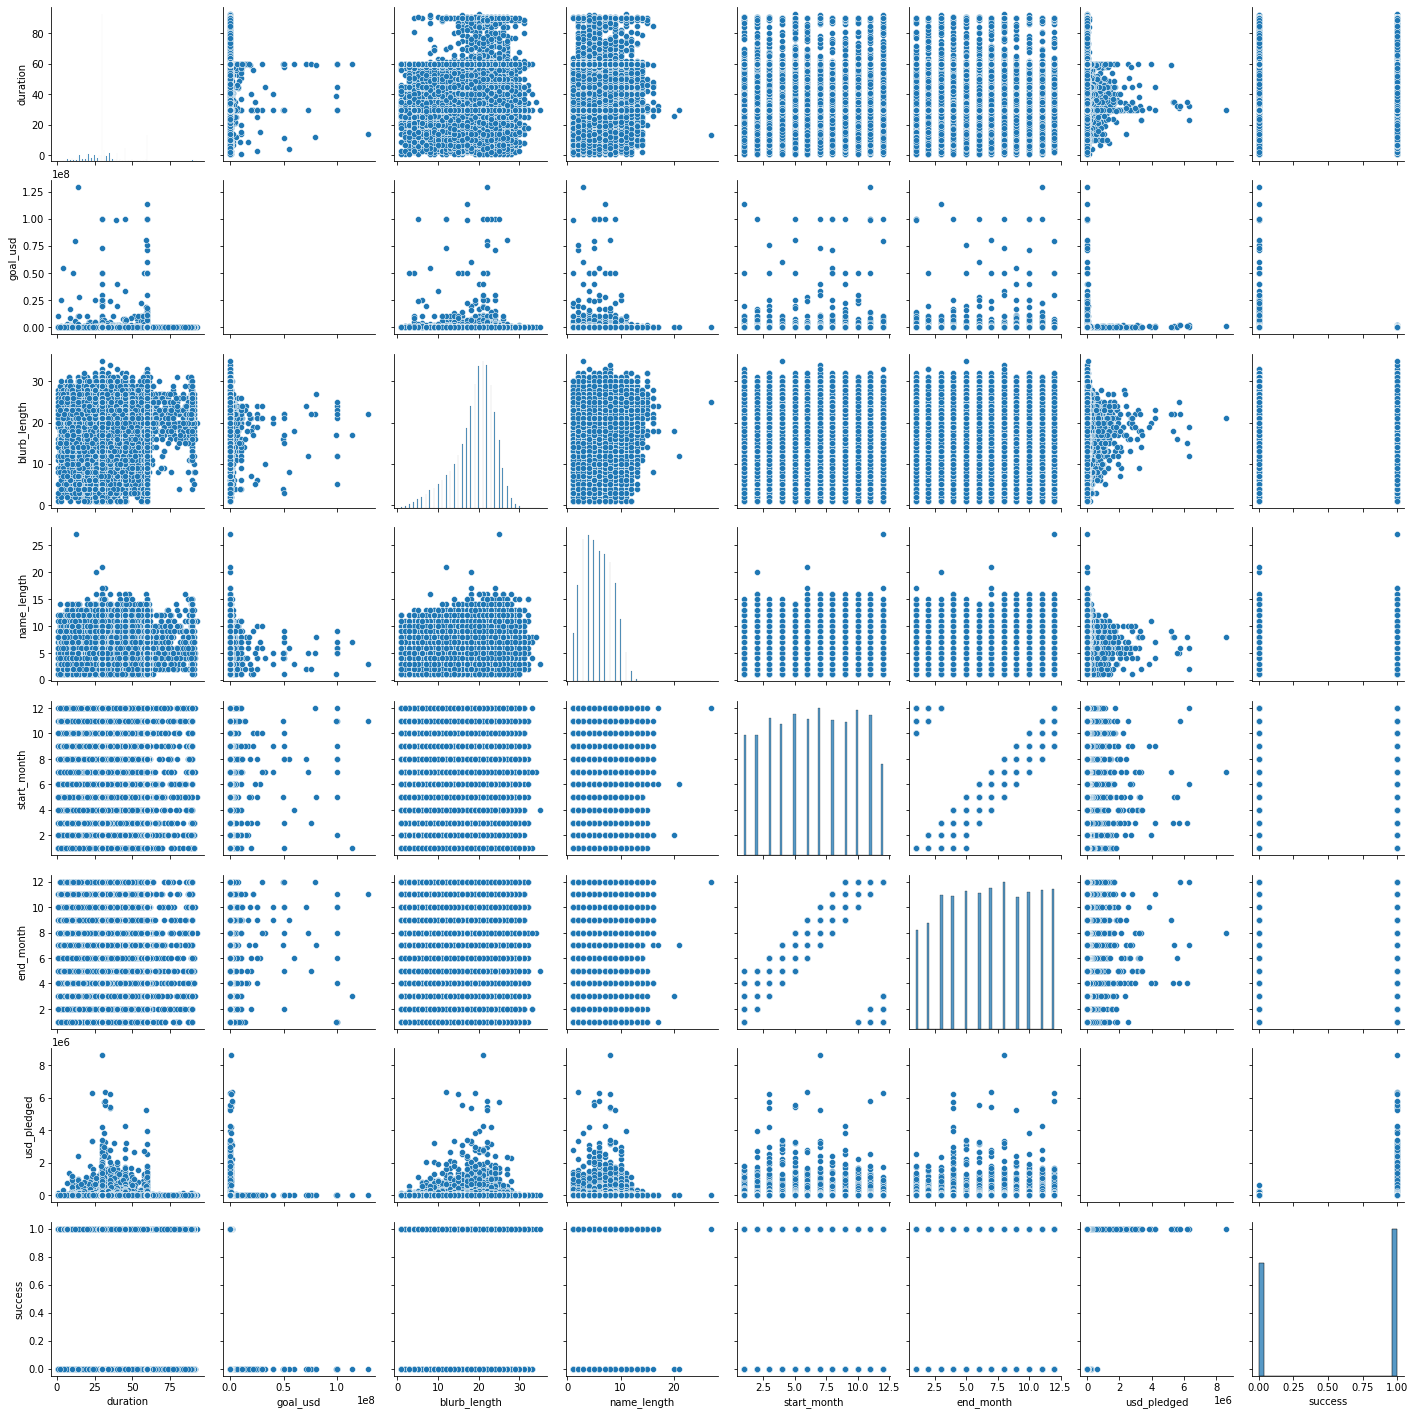

In [15]:
df_num_test = df[['duration','goal_usd','blurb_length','name_length','start_month','end_month','usd_pledged', 'success']]
sns.pairplot (df_num_test)

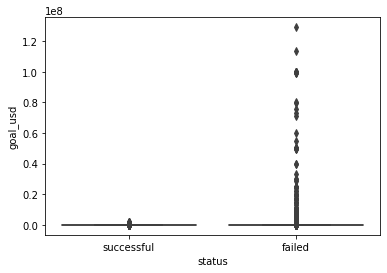

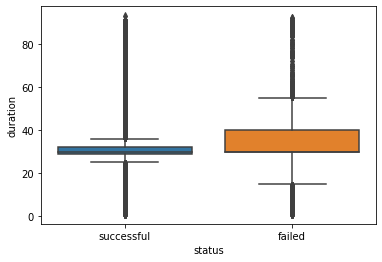

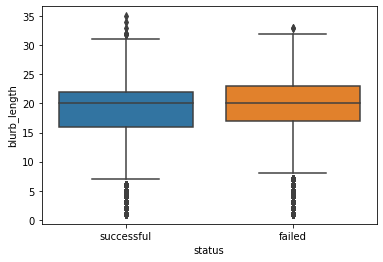

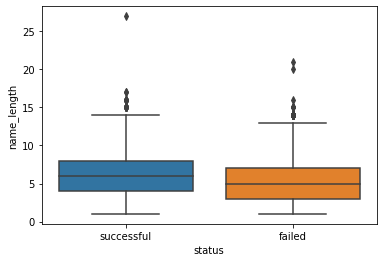

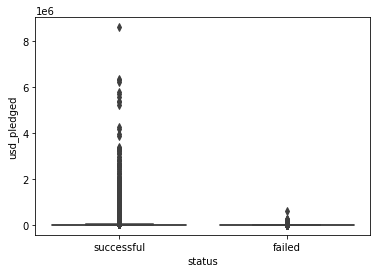

In [37]:
# box plot for numerical data, 'goal_usd','duration', 'blurb_length', 'name_length','usd_pledged'
# according successful or not successful

num_col = ['goal_usd','duration', 'blurb_length', 'name_length','usd_pledged']
for i in num_col:
    sns.boxplot(data = df, x = 'status', y = i)
    plt.show()

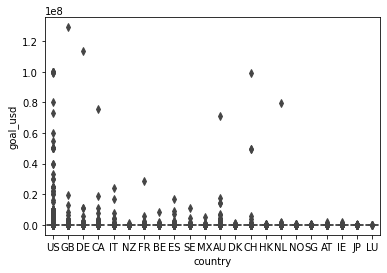

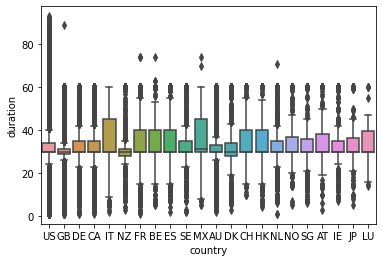

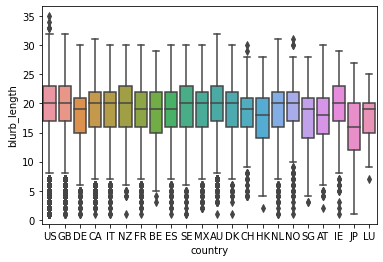

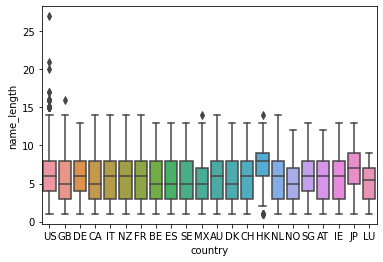

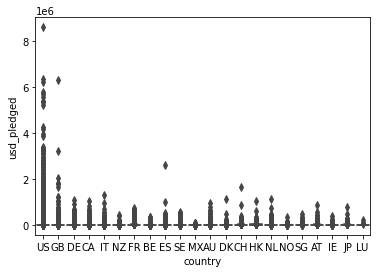

In [38]:
# box plot for numerical data, 'goal_usd','duration', 'blurb_length', 'name_length','usd_pledged'
# according to different country. 

num_col = ['goal_usd','duration', 'blurb_length', 'name_length','usd_pledged']
for i in num_col:
    sns.boxplot(data = df, x = 'country', y = i)
    plt.show()

## Pre-processing  (drop columns)

In [22]:
# Name Labels: columns of 'name','id', 'currency', 'sub_category' will not be used in the model 
# Time Labels: Only 'start_Q'/ 'start_month' will be used for model, ie. launched_at, deadline,end_month,end_Q will be dropped
df.drop(['name','id','currency','sub_category','launched_at', 'deadline','end_month','end_Q'], axis = 1, inplace = True)
df.head()

,main_category,duration,goal_usd,city,state,country,blurb_length,name_length,status,start_month,start_Q,usd_pledged,success
0,games,16.0,2000.00000,Menasha,WI,US,14,7,successful,10,Q4,6061.00000,1
1,comics,30.0,3870.99771,Shepperton,England,GB,24,8,successful,8,Q3,3914.50512,1
2,fashion,30.0,1100.00000,Manhattan,NY,US,21,7,successful,6,Q2,1110.00000,1
3,music,45.0,3500.00000,Nashville,TN,US,15,6,successful,9,Q3,4807.00000,1
4,technology,60.0,30000.00000,Troy,MI,US,15,4,successful,11,Q4,40368.00000,1


In [23]:
# Location label: We noticed that majority (two-third) of the data is in USA. The rest is scattered in different countries 
#                which may hard for sampling across different countries. Therefore, we categorize to column 'US', 1-US and 2-Non-US
df.drop(['city','state'], axis = 1, inplace = True)
df['US based'] = df['country'].apply(lambda x: 1 if x =='US' else 0)
df.drop(['country'],axis=1, inplace = True)
df.head()

,main_category,duration,goal_usd,blurb_length,name_length,status,start_month,start_Q,usd_pledged,success,US based
0,games,16.0,2000.00000,14,7,successful,10,Q4,6061.00000,1,1
1,comics,30.0,3870.99771,24,8,successful,8,Q3,3914.50512,1,0
2,fashion,30.0,1100.00000,21,7,successful,6,Q2,1110.00000,1,1
3,music,45.0,3500.00000,15,6,successful,9,Q3,4807.00000,1,1
4,technology,60.0,30000.00000,15,4,successful,11,Q4,40368.00000,1,1


<AxesSubplot:xlabel='US based', ylabel='count'>

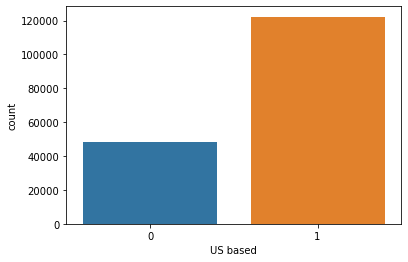

In [43]:
# also a plot for US based 
sns.countplot (data=df, x= 'US based')

## Encoding 

In [24]:
from sklearn.preprocessing import LabelEncoder,  MinMaxScaler

In [25]:
# One-hot encoding for remaining categorial features 
cat_col=['main_category','start_Q']
for col in cat_col:
    ohe_col  = pd.get_dummies(df[col], prefix=col, drop_first=True)
    df = pd.concat((df,ohe_col),axis=1).drop(col,axis=1)
df.head()

,duration,goal_usd,blurb_length,name_length,status,start_month,usd_pledged,success,US based,main_category_comics,...,main_category_games,main_category_journalism,main_category_music,main_category_photography,main_category_publishing,main_category_technology,main_category_theater,start_Q_Q2,start_Q_Q3,start_Q_Q4
0,16.0,2000.00000,14,7,successful,10,6061.00000,1,1,0,...,1,0,0,0,0,0,0,0,0,1
1,30.0,3870.99771,24,8,successful,8,3914.50512,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,30.0,1100.00000,21,7,successful,6,1110.00000,1,1,0,...,0,0,0,0,0,0,0,1,0,0
3,45.0,3500.00000,15,6,successful,9,4807.00000,1,1,0,...,0,0,1,0,0,0,0,0,1,0
4,60.0,30000.00000,15,4,successful,11,40368.00000,1,1,0,...,0,0,0,0,0,1,0,0,0,1


In [26]:
# Label Encoding for target variable: status 
# which already done in previous step and create column 'success', column 'status' will be drop
df.drop('status',axis=1,inplace=True)

In [27]:
df.head()

,duration,goal_usd,blurb_length,name_length,start_month,usd_pledged,success,US based,main_category_comics,main_category_crafts,...,main_category_games,main_category_journalism,main_category_music,main_category_photography,main_category_publishing,main_category_technology,main_category_theater,start_Q_Q2,start_Q_Q3,start_Q_Q4
0,16.0,2000.00000,14,7,10,6061.00000,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,30.0,3870.99771,24,8,8,3914.50512,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,30.0,1100.00000,21,7,6,1110.00000,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,45.0,3500.00000,15,6,9,4807.00000,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,60.0,30000.00000,15,4,11,40368.00000,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [28]:
# Scaling to 0-1 for build up model
df_byquarter = df.drop('start_month', axis=1)
scl = MinMaxScaler()
df_byquarter_scl = scl.fit_transform (df_byquarter)
df_byquarter = pd.DataFrame(df_byquarter_scl, columns = df_byquarter.columns)
df_byquarter

,duration,goal_usd,blurb_length,name_length,usd_pledged,success,US based,main_category_comics,main_category_crafts,main_category_dance,...,main_category_games,main_category_journalism,main_category_music,main_category_photography,main_category_publishing,main_category_technology,main_category_theater,start_Q_Q2,start_Q_Q3,start_Q_Q4
0,0.163043,0.000015,0.382353,0.230769,7.050565e-04,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.315217,0.000030,0.676471,0.269231,4.553617e-04,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.315217,0.000009,0.588235,0.230769,1.291227e-04,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.478261,0.000027,0.411765,0.192308,5.591827e-04,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.641304,0.000232,0.411765,0.115385,4.695878e-03,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170725,0.641304,0.000448,0.588235,0.076923,1.424143e-07,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
170726,0.500000,0.000897,0.500000,0.038462,1.829517e-05,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
170727,0.315217,0.000232,0.352941,0.076923,0.000000e+00,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
170728,0.641304,0.000009,0.058824,0.076923,1.663473e-05,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
df_byquarter.to_csv('data/processed_data(by_quarter).csv')